Build a model based on the data you have scraped. Don't worry if the model is far from perfect. You can always improve later. The most important thing is your story, you can answer the following questions after you finish modeling.

1. Why this project is important? What problem are you trying to solve?

<font color='red'><strong>The current pandemic of COVID-19</strong></font> is so severe worldwide. Any understanding about the disease helps medical doctors, patients, and citizens in general.<br>
    Our team is working on a **classification problem** which involves the fatal outcome of the patients and the patients' demographics,  disease characteristics, and other data available to us.

2. How do you measure the model performance (metrics)? What is the benchmark?

I will apply **precision, recall, f1-score, ROC AUC** as metrics. This is a new test, benchmark not set yet. Will try to predict patient death with less false positive, and increase accuracy.

3. How is your model? Have achieved your goal? How to evaluate the business value of your model?

<font color='brown'>I have established the **classification model** to predict COV-19 patient outcome. It achieved our goal to establish a prediction model</font>. If we can increase the precision and recall, the model will be useful for medical community and all people around the world to gain awareness of disease status and outcome.

4. Any insights have you gotten from your model? Any actionable suggestions can you provide to your business partner?

By feature selection, I found that **background disease, and patient symptom** associate with the outcome more than other features like **age and gender**. May need more data for classification analysis.

5. What is the most challenging part in the project? How did you solve it? How will you futher improve your model if you get more resources and time.

The most challenging part of this project is the data exploring and clean up. I solve it by slecting data with symptom onset date. By this we eliminated more than 70% of records. And concluded that majority of data don't have enough information for classification analysis. Finally, we chose the data from South America, namely <font color ='red'>Mexico and Colombia</font>.

Make sure that your work includes these parts:
1. **Pre-model Analysis**: process and visualize data; get insights of features and target.
2. **Problem Definition**: translate the business needs into machine learning problems; design metrics to measure model performance.
3. **Feature Engineering**: create features which might improve model performance.
4. **Modeling**: Model selection, feature elimination, validation, hyperparameter tuning.
5. **Post-model Analysis**: Model performance, feature importance, actionable suggestions to business.

## 1. Pre-model Analysis: process and visualize data; get insights of features and target.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

pd.set_option('display.max_rows', 999)

df = pd.read_csv('../data/version 6 - 19-5-20.csv', low_memory=False,)
df.head(999)

,age,age_band,background_diseases,background_diseases_binary,city,confirmed_date,country,date_onset_symptoms,deceased_date,infected_by,...,sex,smoking,symptoms,treatment,id,return_date_until_date_onset_symptoms,date_onset_symptoms_until_confirmed_date,confirmed_date_until_released_date,confirmed_date_until_deceased_date,severity_illness_infectious_person
0,NaN,NaN,NaN,NaN,NaN,2020-02-28,france,NaN,NaN,NaN,...,male,NaN,NaN,hospitalized,0,NaN,NaN,-25.0,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,2020-02-28,france,NaN,NaN,NaN,...,male,NaN,NaN,hospitalized,1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,2020-02-28,france,NaN,NaN,NaN,...,female,NaN,NaN,hospitalized,2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,2020-03-03,france,NaN,NaN,NaN,...,male,NaN,NaN,hospitalized,3,NaN,NaN,3.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,2020-03-05,france,NaN,NaN,NaN,...,male,NaN,NaN,home isolation,4,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,2020-03-05,france,NaN,NaN,NaN,...,female,NaN,NaN,hospitalized,5,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,2020-03-05,france,NaN,NaN,NaN,...,female,NaN,NaN,hospitalized,6,NaN,NaN,NaN,NaN,NaN
7,70.0,70.0,NaN,NaN,Montauban,2020-03-06,france,NaN,NaN,NaN,...,male,NaN,NaN,home isolation,7,NaN,NaN,NaN,NaN,NaN
8,83.0,80.0,NaN,NaN,Montauban,2020-03-06,france,NaN,NaN,NaN,...,male,NaN,NaN,home isolation,8,NaN,NaN,NaN,NaN,NaN
9,78.0,70.0,NaN,NaN,Montauban,2020-03-06,france,NaN,NaN,NaN,...,female,NaN,NaN,home isolation,9,NaN,NaN,NaN,NaN,NaN


In [2]:
df.columns

Index(['age', 'age_band', 'background_diseases', 'background_diseases_binary',
       'city', 'confirmed_date', 'country', 'date_onset_symptoms',
       'deceased_date', 'infected_by', 'infection_place', 'region',
       'released_date', 'return_date', 'severity_illness', 'sex', 'smoking',
       'symptoms', 'treatment', 'id', 'return_date_until_date_onset_symptoms',
       'date_onset_symptoms_until_confirmed_date',
       'confirmed_date_until_released_date',
       'confirmed_date_until_deceased_date',
       'severity_illness_infectious_person'],
      dtype='object')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 695045 entries, 0 to 695044
Data columns (total 25 columns):
age                                         214690 non-null float64
age_band                                    215072 non-null float64
background_diseases                         67881 non-null object
background_diseases_binary                  543106 non-null float64
city                                        357200 non-null object
confirmed_date                              689551 non-null object
country                                     694044 non-null object
date_onset_symptoms                         196285 non-null object
deceased_date                               8978 non-null object
infected_by                                 1667 non-null object
infection_place                             11544 non-null object
region                                      496212 non-null object
released_date                               6447 non-null object
return_date            

In [51]:
from scipy.stats import describe

stats = df.describe()
stats.loc['var'] = df.var().tolist()
stats.loc['skew'] = df.skew().tolist()
stats.loc['kurt'] = df.kurtosis().tolist()
#print(stats)
#print(stats.transpose())
stats.transpose()

,count,mean,std,min,25%,50%,75%,max,var,skew,kurt
age,214690.0,42.620018,17.335928,0.0,30.0,41.0,54.0,120.0,3.005344e+02,2.560915e-01,0.036377
age_band,215072.0,38.162336,17.484730,0.0,30.0,40.0,50.0,120.0,3.057158e+02,2.871296e-01,-0.035397
background_diseases_binary,543106.0,0.125007,0.330727,0.0,0.0,0.0,0.0,1.0,1.093804e-01,2.267698e+00,3.142464
smoking,176456.0,0.093173,0.290676,0.0,0.0,0.0,0.0,1.0,8.449257e-02,2.799207e+00,5.835626
id,695045.0,347522.000000,200642.353261,0.0,173761.0,347522.0,521283.0,695044.0,4.025735e+10,1.651800e-15,-1.200000
return_date_until_date_onset_symptoms,1280.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000
date_onset_symptoms_until_confirmed_date,196168.0,3.976668,4.010828,-8.0,1.0,3.0,6.0,90.0,1.608674e+01,2.779863e+00,19.089732
confirmed_date_until_released_date,6443.0,832.160019,3775.432061,-25.0,10.0,15.0,25.0,18352.0,1.425389e+07,4.416424e+00,17.510410
confirmed_date_until_deceased_date,8930.0,337.943337,2445.722213,-30.0,1.0,4.0,9.0,18357.0,5.981557e+06,7.222086e+00,50.170183


In [52]:
df.describe(include = np.object)

,background_diseases,city,confirmed_date,country,date_onset_symptoms,deceased_date,infected_by,infection_place,region,released_date,return_date,severity_illness,sex,symptoms,treatment,severity_illness_infectious_person
count,67881,357200,689551,694044,196285,8978,1667,11544,496212,6447,2160,32758,220105,1631,195773,1069
unique,291,4513,140,139,140,106,1002,1535,955,114,39,5,2,264,3,5
top,"obesity,",Moscow,1970-01-01,mexico,2020-05-01,2020-05-11,4668,contact with patient,Lombardia,2020-05-05,1970-01-01,good,male,fever,clinic,cured
freq,15621,18000,471310,179245,6613,282,51,994,58060,291,1902,13663,110997,405,132042,577


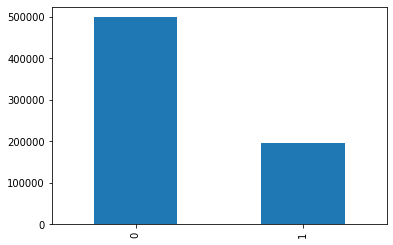

In [53]:
symptoms_onset_date_fl = df.date_onset_symptoms.map(lambda x: 1 if (type(x) == str)  else 0) 

symptoms_onset_date_fl.value_counts()[0:5].plot.bar()

In [54]:
df.severity_illness.value_counts() 

good            13663
deceased         7772
cured            7185
critical         4050
asymptomatic       88
Name: severity_illness, dtype: int64

In [55]:
df.country.value_counts()

mexico                              179245
italy                               158004
united states                       118002
china                                42345
russia                               32759
united kingdom                       17814
colombia                             16672
spain                                16158
canada                               14690
france                               12178
ecuador                              10947
south korea                           7084
iran                                  7026
germany                               6517
egypt                                 4635
south africa                          4542
austria                               4240
netherlands                           4150
brazil                                4121
belgium                               3746
singapore                             3570
korea                                 3491
chile                                 2739
philippines

In [56]:
len(df[df["country"].notnull()].country.unique() )

139

In [57]:
len(df.country.value_counts() )

139

In [58]:
#df.country.value_counts()[0:5].plot.bar()

In [59]:
dfoi = df[df['date_onset_symptoms'].notnull()]

mexico           179245
italy            158004
united states    118002
china             42345
russia            32759
Name: country, dtype: int64 

########################

mexico      179239
colombia     14297
china          940
korea          491
japan          486
Name: country, dtype: int64



Barcharts of Patients Counts by Country


Text(0.5, 1.0, 'dfoi - has Symptoms Onset Date')

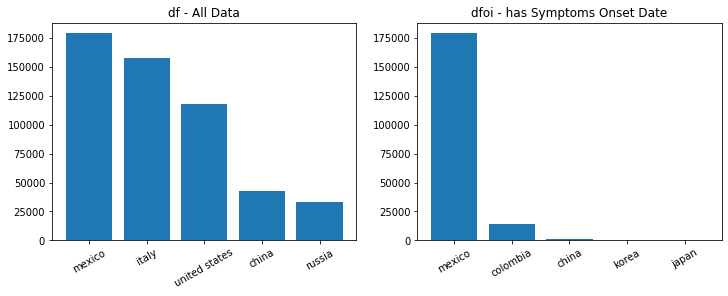

In [60]:
print(df.country.value_counts()[0:5], \
      '\n\n########################\n\n' \
      + str(dfoi.country.value_counts()[0:5]))

print('\n\n\nBarcharts of Patients Counts by Country')
fig = plt.figure(figsize=(12,4))
#fig = plt.figure(2,1)
plt.subplot(1,2,1)
plt.bar(height = df.country.value_counts()[0:5], x = df.country.value_counts()[0:5].index)
plt.xticks(rotation=30)
plt.title('df - All Data')

plt.subplot(1,2, 2)
plt.bar(height = dfoi.country.value_counts()[0:5], x = dfoi.country.value_counts()[0:5].index)
plt.xticks(rotation=30)
plt.title('dfoi - has Symptoms Onset Date')
#dfoi.symptoms.value_counts()[0:10].plot.bar(logy =True)

In [61]:
len(df.symptoms.value_counts() ), len(dfoi.symptoms.value_counts() )

(264, 185)

In [62]:
print( df.symptoms.value_counts()[:10], \
      '\n\n###############################\n\n' \
      + str(dfoi.symptoms.value_counts()[:10] ))

fever                                 405
cough, fever                          213
cough                                  70
pneumonia                              64
no_symptom                             46
cough, fever, myalgia                  38
breathing difficulty, cough, fever     36
breathing difficulty, pneumonia        27
breathing difficulty                   23
fever, sore throat                     22
Name: symptoms, dtype: int64 

###############################

fever                                 356
cough, fever                          174
cough                                  54
pneumonia                              44
cough, fever, myalgia                  22
breathing difficulty, cough, fever     19
cough, fever, sputum                   19
fever, sore throat                     19
breathing difficulty                   17
cough, fever, sore throat              13
Name: symptoms, dtype: int64




Barcharts of Patients Counts by Symptoms


Text(0.5, 1.0, 'dfoi - has Symptoms Onset Date')

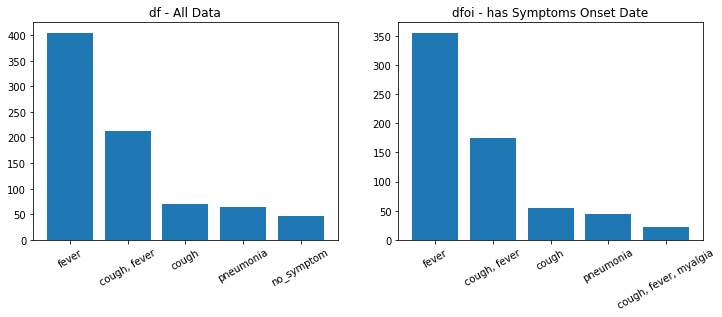

In [63]:
print('\n\nBarcharts of Patients Counts by Symptoms')
fig = plt.figure(figsize=(12,4))
#fig = plt.figure(2,1)
plt.subplot(1,2,1)
plt.bar(height = df.symptoms.value_counts()[0:5], x = df.symptoms.value_counts()[0:5].index)
plt.xticks(rotation=30)
plt.title('df - All Data')

plt.subplot(1,2, 2)
plt.bar(height = dfoi.symptoms.value_counts()[0:5], x = dfoi.symptoms.value_counts()[0:5].index)
plt.xticks(rotation=30)
plt.title('dfoi - has Symptoms Onset Date')
#dfoi.symptoms.value_counts()[0:10].plot.bar(logy =True)


Death = 1, Others = 0 

All Dataset
0    686067
1      8978
Name: death, dtype: int64

Selected: Patient has Symptoms Onset Date
0    187607
1      8678
Name: death, dtype: int64

Mexico
0    171248
1      7997
Name: death, dtype: int64

Mexico + Colombia
0    187313
1      8604
Name: death, dtype: int64



Barcharts of Patients Counts by Healthcare Outcome


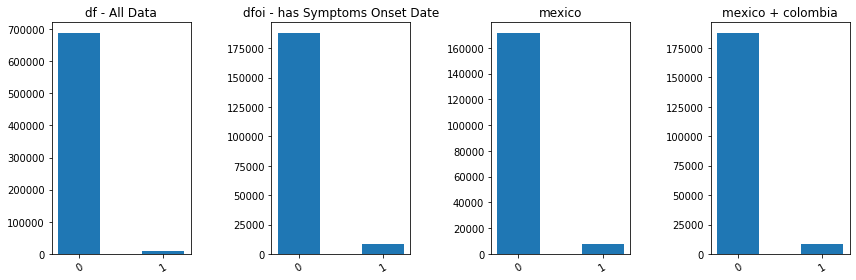

In [110]:
data1 = {'death': np.where(df['deceased_date'].isnull(), 0, 1)}
#pd.DataFrame(data1).death.value_counts().plot.bar(logy=True)

data2 = {'death': np.where(dfoi['deceased_date'].isnull(), 0, 1)}
#pd.DataFrame(data2).death.value_counts().plot.bar(logy=True)

mex = pd.DataFrame()
mex['death'] = df[(df['country']=='mexico')]['deceased_date'].map(lambda x: 1 if (type(x) == str)  else 0) 

mc = pd.DataFrame()
mc['death'] = df[( (df['country'] == 'mexico') | (df['country'] == 'colombia')  )]\
              ['deceased_date'].map(lambda x: 1 if (type(x) == str)  else 0) 
#print('\nDeath = 1, Others = 0 \n' + str(mex.death.value_counts() ))

print('\nDeath = 1, Others = 0 \n\nAll Dataset\n'\
      + str(pd.DataFrame(data1).death.value_counts())\
      + '\n\nSelected: Patient has Symptoms Onset Date\n'+ str(pd.DataFrame(data2).death.value_counts() )\
      + '\n\nMexico\n' + str(mex.death.value_counts() )\
      + '\n\nMexico + Colombia\n' + str(mc.death.value_counts() ))


print('\n\n\nBarcharts of Patients Counts by Healthcare Outcome')
fig = plt.subplots(figsize=(12,4), sharey = True)
plt.subplot(1,4,1)
plt.bar(height = pd.DataFrame(data1).death.value_counts(), x = ('0', '1'), width=0.5,)
plt.xticks(rotation=30)
plt.title('df - All Data')
#plt.yscale('log')

plt.subplot(1,4, 2)
plt.bar(height = pd.DataFrame(data2).death.value_counts(), x = ('0', '1'),width=0.5,)
plt.xticks(rotation=30)
plt.title('dfoi - has Symptoms Onset Date')
#plt.yscale('log')

plt.subplot(1,4, 3)
plt.bar(height = mex.death.value_counts(), x = ('0', '1'),width=0.5,)
plt.xticks(rotation=30)
plt.title('mexico')
#plt.yscale('log')

plt.subplot(1,4, 4)
plt.bar(height = mc.death.value_counts(), x = ('0', '1'),width=0.5,)
plt.xticks(rotation=30)
plt.title('mexico + colombia')
#plt.yscale('log')

plt.tight_layout()

In [3]:
df2 = df[( (df['country']=='mexico') | (df['country']=='colombus') ) & df['date_onset_symptoms'].notnull()]
len(df2)

179239

## 2. Problem Definition: translate the business needs into machine learning problems; design metrics to measure model performance.

###  1). We will classify the data into two parts: survival or death of patient health outcome. Create a label "Death", and transform other data into features, like patient's age, gender, country, region, symptoms onset days, background disease.

### 2). We will apply classification metrics like accuracy, recall, precision, ROC AUC, threshold to evaluate model performance.

## 3. Feature Engineering: create features which might improve model performance.


In [4]:
from sklearn.model_selection import train_test_split
X, X_test = train_test_split(df2, 
                                   test_size=0.2, 
                                   random_state=2019)

X = X.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

len(X), len(X_test)

(143391, 35848)

In [5]:
class FeatureTransformer(object):
    
    def fit(self, X, y=None):
        df = pd.DataFrame()
        #df['background_diseases_binary'] = X['background_diseases_binary']
        df['bg_disease_cnt'] = X.background_diseases.map(lambda x: len(x.split(',')) if type(x) == str  else 0) 
        df['symptoms_cnt'] = X.symptoms.map(lambda x: len(x.split(',')) if (type(x) == str and x != 'no_symptom')  else 0)
        df['days_onset'] =  (pd.to_datetime(np.where(X['deceased_date'].isnull(), ('2020-05-19'), X['deceased_date']))\
                             - pd.to_datetime(X.date_onset_symptoms) ).dt.days + 1
        df['days_confirm'] =  (pd.to_datetime(np.where(X['deceased_date'].isnull(), ('2020-05-19'), X['deceased_date']))\
                               - pd.to_datetime(X.confirmed_date) ).dt.days + 1
        df['days_confirm'] = df['days_confirm'].fillna(df['days_confirm'].mean()) 
        #df['death'] = np.where(X['deceased_date'].isnull(), 0, 1)
        df['gender'] = X.sex.map(lambda x: 2 if x == 'male' else (1 if x == 'female' else 0) )
        df['age'] = X.age.fillna(X['age'].mean())
        df['smoke'] = np.where(X['smoking'].isnull(), 0, 1)
        df['treat'] = X.treatment.map(lambda x: 3 if x == 'hospitalized' else (2 if x == 'hospital' or x == 'clinical' else \
                                        (1 if x == 'home isolation' else 0 ) ) )
        
        self.means = df.mean()
        
    def transform(self, X, y=None):
        df = pd.DataFrame()
        #df['background_diseases_binary'] = X['background_diseases_binary']
        df['bg_disease_cnt'] = X.background_diseases.map(lambda x: len(x.split(',')) if type(x) == str  else 0) 
        df['symptoms_cnt'] = X.symptoms.map(lambda x: len(x.split(',')) if (type(x) == str and x != 'no_symptom')  else 0)
        df['days_onset'] =  (pd.to_datetime(np.where(X['deceased_date'].isnull(), ('2020-05-19'), X['deceased_date']))\
                             - pd.to_datetime(X.date_onset_symptoms) ).dt.days + 1
        df['days_confirm'] =  (pd.to_datetime(np.where(X['deceased_date'].isnull(), ('2020-05-19'), X['deceased_date']))\
                               - pd.to_datetime(X.confirmed_date) ).dt.days + 1
        df['days_confirm'] = df['days_confirm'].fillna(df['days_confirm'].mean()) 
        #df['death'] = np.where(X['deceased_date'].isnull(), 0, 1)
        df['gender'] = X.sex.map(lambda x: 2 if x == 'male' else (1 if x == 'female' else 0) )
        df['age'] = X.age.fillna(X['age'].mean())
        df['smoke'] = np.where(X['smoking'].isnull(), 0, 1)
        df['treat'] = X.treatment.map(lambda x: 3 if x == 'hospitalized' else (2 if x == 'hospital' or x == 'clinical' else \
                                        (1 if x == 'home isolation' else 0 ) ) )
        
        #return df.fillna(self.mean)                              # equivalent

        return df
    
    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)


In [6]:
def death(x):
    if type(x) != str:     # NaN is not string
        x = 0
    else:
        x = 1
    return x

features = list(X.columns)
#features = ['background_diseases', 'symptoms', 'date_onset_symptoms', 'confirmed_date', 'sex', 'age', 'smoking', 'treatment']

# Actual engineered features:
#features = ['bg_disease_cnt', 'symptoms_cnt', 'days_onset',     'days_confirm',     'gender', 'age',  'smoke',   'treat']

target = 'deceased_date'
#features.remove(target)

X = X[features]
y = X[target].map(death)

X_test = X_test[features]
y_test = X_test[target].map(death)

#X.head(999)
#y.head(999)

In [7]:
X_train, X_valid, y_train, y_valid = train_test_split(X, 
                                                      y, 
                                                      test_size=0.2, 
                                                      random_state=2019)

In [8]:
len(X_train), len(X_valid), len(y_train), len(y_valid)

(114712, 28679, 114712, 28679)

# 4. Modeling: Model selection, feature elimination, validation, hyperparameter tuning.


In [49]:
#from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

steps = [('ft', FeatureTransformer()),
         ('smt', SMOTE (random_state=42)),
         ('rescale', MinMaxScaler()), 
         ('logr', LogisticRegression(C = 1000, random_state = 0, solver = 'newton-cg', class_weight = 'balanced')), ]
model = Pipeline(steps)
model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Pipeline(steps=[('ft',
                 <__main__.FeatureTransformer object at 0x0000027DBE44C688>),
                ('smt', SMOTE(random_state=42)), ('rescale', MinMaxScaler()),
                ('logr',
                 LogisticRegression(C=1000, class_weight='balanced',
                                    random_state=0, solver='newton-cg'))])

In [50]:
# X_train_res = model[0].fit_transform(X_train)
# X_test_res = model[0].fit_transform(X_test)
# X_valid_res = model[0].fit_transform(X_valid)


In [51]:
# steps = [('smt', SMOTE (random_state=42)),
#          ('rescale', MinMaxScaler()), 
#          ('logr', LogisticRegression(C = 1000, random_state = 0, solver = 'newton-cg', class_weight = 'balanced')), ]
# model = Pipeline(steps)
# model.fit(X_train_res, y_train)

In [52]:
y_train_pred = model.predict(X_train)

y_valid_pred = model.predict(X_valid)

y_train_pred.shape, y_valid_pred.shape, y_train_pred, y_valid_pred

((114712,),
 (28679,),
 array([1, 0, 0, ..., 0, 1, 1], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64))

In [53]:
from sklearn.metrics import accuracy_score

print ("y_train Accuracy Rate, which is calculated by accuracy_score() is: %.3f"%accuracy_score(y_train, y_train_pred) )
print ("y_test Accuracy Rate, which is calculated by accuracy_score() is: %.3f"%accuracy_score(y_valid, y_valid_pred) )

y_train Accuracy Rate, which is calculated by accuracy_score() is: 0.885
y_test Accuracy Rate, which is calculated by accuracy_score() is: 0.886


In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred,))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94    109579
           1       0.27      0.91      0.41      5133

    accuracy                           0.89    114712
   macro avg       0.63      0.90      0.68    114712
weighted avg       0.96      0.89      0.91    114712



In [55]:
print(classification_report(y_valid, y_valid_pred,))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94     27383
           1       0.27      0.91      0.42      1296

    accuracy                           0.89     28679
   macro avg       0.63      0.90      0.68     28679
weighted avg       0.96      0.89      0.91     28679



In [56]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_train_pred)
cm

array([[96870, 12709],
       [  469,  4664]], dtype=int64)

In [57]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_valid, y_valid_pred)
cm

array([[24237,  3146],
       [  120,  1176]], dtype=int64)

### ROC AUC

In [58]:
from sklearn.metrics import roc_auc_score
print('train roc_auc_scores:', roc_auc_score(y_train, y_train_pred, average='macro', ) )
print('valid roc_auc_scores: ', roc_auc_score(y_valid, y_valid_pred, average='macro', ) )

train roc_auc_scores: 0.8963250894284385
valid roc_auc_scores:  0.8962593038936025


### Probability, threshold, and (precision, recall, f1-score, accuracy)

In [20]:
y_train_proba = model.predict_proba(X_train)[:,1]
y_valid_proba = model.predict_proba(X_valid)[:,1]

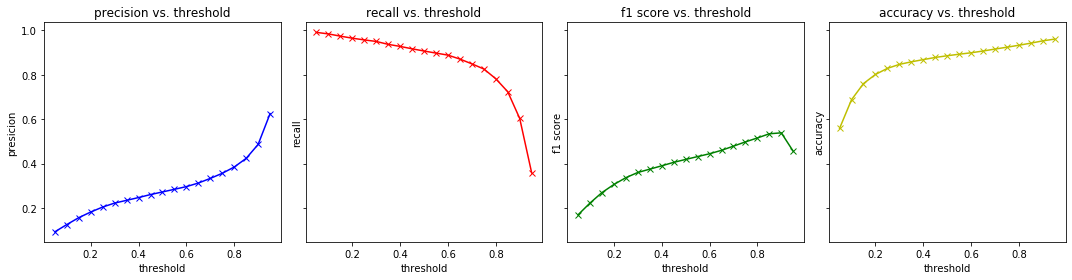

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

a = []
p = []
r = []
f = []
for threshold in np.arange(0.05, 1, 0.05):
    y_valid_pred = pd.Series(y_valid_proba).map(lambda x: 0 if x <= threshold else 1)
    a.append(accuracy_score(y_valid, y_valid_pred))
    p.append(precision_score(y_valid, y_valid_pred))
    r.append(recall_score(y_valid, y_valid_pred))
    f.append(f1_score(y_valid, y_valid_pred))


fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize =(15,4), sharey = True)

ax1.plot(np.arange(0.05, 1, 0.05), p, 'bx-')
ax1.set(title='precision vs. threshold', xlabel='threshold', ylabel='presicion')
# ax1.set_xlabel('threshold')
# ax1.set_ylabel('presicion')
# ax1.set_title('precision vs. threshold')
#ax1.legend(loc='best', labels=['precision'])
ax2.plot(np.arange(0.05, 1, 0.05), r, 'rx-')
ax2.set(title='recall vs. threshold', xlabel='threshold', ylabel='recall')
# ax2.set_xlabel('threshold')
# ax2.set_ylabel('recall')
# ax2.set_title('recall vs. threshold')
ax3.plot(np.arange(0.05, 1, 0.05), f, 'gx-')
ax3.set(title='f1 score vs. threshold', xlabel='threshold', ylabel='f1 score')
# ax3.set_xlabel('threshold')
# ax3.set_ylabel('f1 score')
# ax3.set_title('f1 score vs. threshold')
ax4.plot(np.arange(0.05, 1, 0.05), a, 'yx-')
ax4.set(title='accuracy vs. threshold', xlabel='threshold', ylabel='accuracy')
plt.tight_layout()

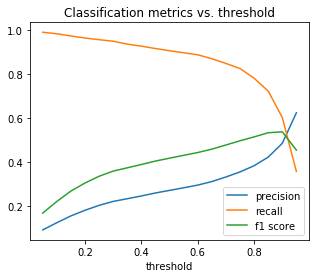

In [22]:
fig, ax = plt.subplots(1, 1, figsize =(5,4))

sns.lineplot(np.arange(0.05, 1, 0.05), p,)
ax.set(title='Classification metrics vs. threshold', xlabel='threshold',)

sns.lineplot(np.arange(0.05, 1, 0.05), r, )

sns.lineplot(np.arange(0.05, 1, 0.05), f, )

plt.legend(loc='best', labels=['precision', 'recall', 'f1 score'])

In [23]:
threshold = 0.6
y_train_pred = pd.Series(y_train_proba).map(lambda x: 0 if x <= threshold else 1)
y_valid_pred = pd.Series(y_valid_proba).map(lambda x: 0 if x <= threshold else 1)
#y_train_pred

In [24]:
from sklearn.metrics import accuracy_score

print ("y_train Accuracy Rate, which is calculated by accuracy_score() is: %.3f"%accuracy_score(y_train, y_train_pred) )
print ("y_test Accuracy Rate, which is calculated by accuracy_score() is: %.3f"%accuracy_score(y_valid, y_valid_pred) )

y_train Accuracy Rate, which is calculated by accuracy_score() is: 0.899
y_test Accuracy Rate, which is calculated by accuracy_score() is: 0.900


In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred,))

              precision    recall  f1-score   support

           0       0.99      0.90      0.94    109579
           1       0.29      0.88      0.44      5133

    accuracy                           0.90    114712
   macro avg       0.64      0.89      0.69    114712
weighted avg       0.96      0.90      0.92    114712



In [26]:
print(classification_report(y_valid, y_valid_pred,))

              precision    recall  f1-score   support

           0       0.99      0.90      0.94     27383
           1       0.30      0.89      0.44      1296

    accuracy                           0.90     28679
   macro avg       0.65      0.89      0.69     28679
weighted avg       0.96      0.90      0.92     28679



In [27]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_train_pred)
cm

array([[98579, 11000],
       [  606,  4527]], dtype=int64)

In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_valid, y_valid_pred)
cm

array([[24645,  2738],
       [  144,  1152]], dtype=int64)

### ROC AUC

In [29]:
from sklearn.metrics import roc_auc_score
print('train roc_auc_scores:', roc_auc_score(y_train, y_train_pred, average='macro', ) )
print('valid roc_auc_scores: ', roc_auc_score(y_valid, y_valid_pred, average='macro', ) )

train roc_auc_scores: 0.8907780940186096
valid roc_auc_scores:  0.894449922295666


##  <font color='red'>K-fold cross-validation </font>

### 1. cross_val_score (metric is ROC AUC, bigger is better)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

C =  [0.001, 0.01, 0.1, 1, 10, 100, 1000]
metric = []
for c in C :

    steps = [('ft', FeatureTransformer()),
         ('rescale', MinMaxScaler()),  
         ('logr', LogisticRegression(C = c, random_state = 0, solver = 'lbfgs', class_weight = 'balanced',)), ] 
    model = Pipeline(steps)
    model = model.fit(X, y)
    
    seed = 7
    kfold = KFold(n_splits=10, random_state=seed)
    scoring = 'roc_auc'
    results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    metric.append(results.mean() )
    
    
    #accuracies = cross_val_score(estimator = model, X = X, y = y, cv = 5)
    #accuracy.append(accuracies.mean() )

[(0.001, 0.9292770734274185), (0.01, 0.9409395717133077), (0.1, 0.9475649766794166), (1, 0.9493469537424197), (10, 0.9495972964026281), (100, 0.9496084704992628), (1000, 0.9496086669026014)]


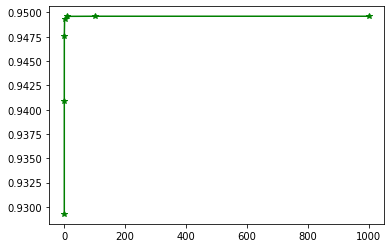

In [341]:
print(list(zip(C, metric)))
plt.plot(C, metric, 'g*-')

##  <font color='red'>K-fold cross-validation </font>

### 2. cross_val_score (metric is Negative Log Loss, bigger is better)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

C =  [0.001, 0.01, 0.1, 1, 10, 100, 1000]
metric = []
for c in C :

    steps = [('ft', FeatureTransformer()),
         ('rescale', MinMaxScaler()),  
         ('logr', LogisticRegression(C = c, random_state = 0, solver = 'lbfgs', class_weight = 'balanced',)), ] 
    model = Pipeline(steps)
    model = model.fit(X, y)
    
    seed = 7
    kfold = KFold(n_splits=10, random_state=seed)
    scoring = 'neg_log_loss'
    results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    metric.append(results.mean() )

[(0.001, -0.40453023603873667), (0.01, -0.3355133487331936), (0.1, -0.3059500349695313), (1, -0.30027308870153047), (10, -0.2998295276582584), (100, -0.29984747435450737), (1000, -0.2998492047148532)]


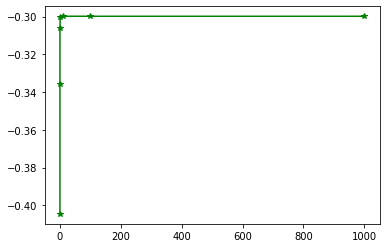

In [354]:
m = [-i for i in metric]   
print(list(zip(C, metric)))
plt.plot(C, metric, 'g*-')

##  <font color='red'>K-fold cross-validation</font>

### 3. cross_val_score (metric is accuracy, bigger is better)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

C =  [0.001, 0.01, 0.1, 1, 10, 100, 1000]
accuracy = []
for c in C :

    steps = [('ft', FeatureTransformer()),
         ('rescale', MinMaxScaler()),  
         ('logr', LogisticRegression(C = c, random_state = 0, solver = 'lbfgs', class_weight = 'balanced',)), ] 
    model = Pipeline(steps)
    model = model.fit(X, y)
    accuracies = cross_val_score(estimator = model, X = X, y = y, cv = 5)
    accuracy.append(accuracies.mean() )

plt.plot(C, accuracy, 'g*-')

[(0.001, 0.7856536479641764), (0.01, 0.8357515510899173), (0.1, 0.868835929690482), (1, 0.8753731830102376), (10, 0.8762846171200426), (100, 0.8763789012877409), (1000, 0.8763789001901305)]


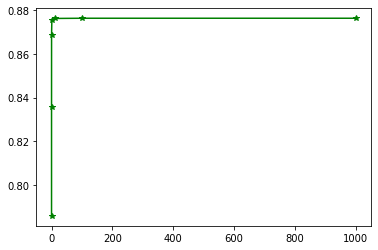

In [331]:
print(list(zip(C, accuracy)))
plt.plot(C, accuracy, 'g*-')

## <font color='red'>GridSearchCV</font> (can be used to find best values for multiple hyper parameters)

In [362]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

parameters = {'logr__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'logr__solver': ['newton-cg', 'lbfgs',  'sag'],
              'logr__multi_class': ['ovr', 'multinomial'],
              'logr__class_weight': [None, 'balanced'],
             }
scorer = make_scorer('roc_auc', greater_is_better = False)
#scorer = make_scorer('roc_auc') #scoring = 'roc_auc'

steps = [('ft', FeatureTransformer()),
         ('rescale', MinMaxScaler()),  
         ('logr', LogisticRegression(random_state = 0, solver = 'lbfgs', class_weight = 'balanced',)), ]
pipe = Pipeline(steps)

model_gsv = GridSearchCV(pipe, parameters, cv = 5, scoring = "roc_auc") 

# model_gsv.best_params_
# {'logr__C': 1000,
#  'logr__class_weight': 'balanced',
#  'logr__multi_class': 'ovr',
#  'logr__solver': 'lbfgs'}

# --- if try below setting, will get the result as shown on right ---
#parameters = {'logr__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],}
#model_gsv = GridSearchCV(pipe, parameters, cv = 5, scoring = "accuracy")  # model_gsv.best_params_: {'logr__C': 100}
#model_gsv = GridSearchCV(pipe, parameters, cv = 5, scoring = "roc_auc")  # model_gsv.best_params_: {'logr__C': 1000}

model_gsv

model_gsv = model_gsv.fit(X, y)

model_gsv.best_params_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not c

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


{'logr__C': 1000,
 'logr__class_weight': 'balanced',
 'logr__multi_class': 'ovr',
 'logr__solver': 'lbfgs'}

In [363]:
model_gsv.cv_results_

{'mean_fit_time': array([0.60737934, 0.50526071, 0.63629961, 1.27319832, 0.71768212,
        0.74081588, 0.77532659, 0.58144608, 0.69035521, 1.26521821,
        0.86269321, 0.82439675, 0.80125747, 0.62272811, 0.70203233,
        1.68529453, 0.97279873, 0.85232205, 0.74361129, 0.63988857,
        0.76436462, 1.63343291, 1.19321089, 0.88064685, 0.90857081,
        0.71189651, 0.74342566, 2.1207315 , 1.10504532, 0.91575298,
        0.80484815, 0.74440994, 0.92624264, 1.6400166 , 1.3478004 ,
        2.26057758, 0.91076536, 0.71588631, 0.89681597, 2.41495028,
        1.21197462, 1.1918138 , 0.81282783, 0.73523445, 2.40101995,
        1.85902901, 1.37801857, 3.14720225, 0.93908606, 0.74460969,
        0.94068651, 2.47837543, 1.28436651, 1.42598505, 0.84573894,
        0.75238795, 2.38404303, 2.02099671, 1.40286341, 3.17072835,
        1.03323703, 0.76555352, 0.95345845, 2.54739084, 1.21315618,
        1.41980271, 0.84633756, 0.72925029, 2.39699283, 1.93183475,
        1.4582026 , 3.16089101,

### <font color = 'green'>**Further fine tuning hyper parameters:**</font>Since C = 1000 in above search, I will do a 2nd round with C in [ 100, 1000, 10000, 100000]; also increased max_inter from default 100 to 10k.

In [366]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

parameters = {'logr__C': [ 100, 1000, 10000, 100000],
              'logr__solver': ['newton-cg', 'lbfgs',  'sag'],
              'logr__class_weight': [None, 'balanced'],
             }

steps = [('ft', FeatureTransformer()),
         ('rescale', MinMaxScaler()),  
         ('logr', LogisticRegression(max_iter=10000, random_state = 0, solver = 'lbfgs', class_weight = 'balanced',)), ]
pipe = Pipeline(steps)

model_gsv = GridSearchCV(pipe, parameters, cv = 5, scoring = 'roc_auc')
model_gsv

model_gsv = model_gsv.fit(X, y)

model_gsv.best_params_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not c

{'logr__C': 100000,
 'logr__class_weight': 'balanced',
 'logr__solver': 'newton-cg'}

# Test data

In [30]:
y_test_pred = model.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score

print ("y_test Accuracy Rate, which is calculated by accuracy_score() is: %.3f"%accuracy_score(y_test, y_test_pred) )

y_test Accuracy Rate, which is calculated by accuracy_score() is: 0.887


In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred,))


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)
cm

              precision    recall  f1-score   support

           0       1.00      0.89      0.94     34280
           1       0.27      0.91      0.41      1568

    accuracy                           0.89     35848
   macro avg       0.63      0.90      0.68     35848
weighted avg       0.96      0.89      0.91     35848



array([[30353,  3927],
       [  134,  1434]], dtype=int64)

In [33]:
from sklearn.metrics import roc_auc_score
print('test roc_auc_scores:', roc_auc_score(y_test, y_test_pred, average='macro', ) )


test roc_auc_scores: 0.8999921117805347


In [34]:
### Probability, threshold, and (precision, recall, f1-score, accuracy)

y_test_proba = model.predict_proba(X_test)[:,1]


threshold = 0.85
y_test_pred = pd.Series(y_test_proba).map(lambda x: 0 if x <= threshold else 1)

#y_test_pred

In [35]:
from sklearn.metrics import accuracy_score

print ("y_test Accuracy Rate, which is calculated by accuracy_score() is: %.3f"%accuracy_score(y_test, y_test_pred) )

from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred,))


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)
cm

y_test Accuracy Rate, which is calculated by accuracy_score() is: 0.946
              precision    recall  f1-score   support

           0       0.99      0.96      0.97     34280
           1       0.43      0.73      0.54      1568

    accuracy                           0.95     35848
   macro avg       0.71      0.84      0.76     35848
weighted avg       0.96      0.95      0.95     35848



array([[32774,  1506],
       [  429,  1139]], dtype=int64)

In [36]:
from sklearn.metrics import roc_auc_score
print('test roc_auc_scores:', roc_auc_score(y_test, y_test_pred, average='macro', ) )


test roc_auc_scores: 0.8412353695854071


# 5. Post-model Analysis: Model performance, feature importance, actionable suggestions to business.

### I applied train data, validation data, and test data. From the classification report of all three data sources, the results are consistent in the logistic regression. The ROC AUC scores are also consistent<font color = 'green'> (0.896, 0.896, 0.845, respectively)</font>.

- We still need to decide we need more specificity, or more precision, or else. 
- We are still exploring to improve prediction. If business can provide high quality data, and more observations and more features, there will be expected improvement in the classification.

In [41]:
features = ['bg_disease_cnt','symptoms_cnt','days_onset','days_confirm','gender','age','smoke','treat']
importance = model[3].coef_
importance = importance.tolist()[0]
importance

[1.9036238095221467,
 0.0,
 -910.916680461615,
 -1656.3303767904745,
 -1.175445264169786,
 3.849776587749722,
 -0.8521958847105927,
 3.4516778638001724]

Feature: 0, Score: 1.90362
Feature: 1, Score: 0.00000
Feature: 2, Score: -910.91668
Feature: 3, Score: -1656.33038
Feature: 4, Score: -1.17545
Feature: 5, Score: 3.84978
Feature: 6, Score: -0.85220
Feature: 7, Score: 3.45168


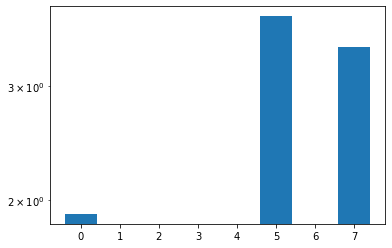

In [42]:
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.yscale('log')
#plt.show()

In [43]:
labels = ['0']*8
for i in range(8):
     labels[i] = features[i] + ' '+ str(importance[i])  


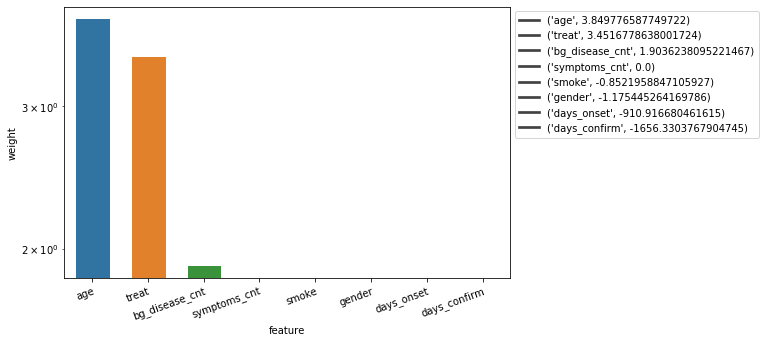

In [44]:
sorted_imps = list(sorted(zip(features, importance), key=lambda x:x[-1], reverse=True) )


import pylab as plt
import seaborn as sns
fig, ax = plt.subplots(1,1, figsize=(8, 5))
ax = sns.barplot(x=list(range(8)), y=[e[1] for e in sorted_imps], )
                # hue=importance, dodge = False,  )
ax.set_yscale('log')
ax.set(xlabel= 'feature', ylabel='weight', xticklabels=[e[0] for e in sorted_imps], )
ax.legend(loc=6, bbox_to_anchor=(1.0, 0.75), labels=sorted_imps)
plt.setp(ax.get_xticklabels(), rotation=20, ha="right", rotation_mode="anchor") 
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .6)

change_width(ax, .6)